## Perform Differentiation in PyTorch

##### This is my note from the IBM PyTorch lesson.

In [1]:
import torch 
import matplotlib.pylab as plt

## Derivatives

##### `requires_grad = True` -> take the derivative of the tensor.

In [2]:
x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

The tensor x:  tensor(2., requires_grad=True)


create a tensor according to the equation $ y=x^2 $.

In [3]:
y = x ** 2
print("The result of y = x^2: ", y)

The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)


In [4]:
y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor(4.)


The preceding lines perform the following operation: 

$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$

In [5]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True


In [6]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(4.)
grad_fn: <PowBackward0 object at 0x111580970>
grad: None
is_leaf: False
requires_grad: True


/var/folders/h0/1qbsqb5s27qgqgpdmd83xrx00000gn/T/ipykernel_4308/1355624623.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print('grad:',y.grad)


#### Calculate the $ y=x^2 + 2x + 1 $, then find the derivative

In [8]:
x = torch.tensor(2.0, requires_grad = True)
y = x ** 2 + 2 * x + 1
print("The result of y = x^2 + 2x + 1: ", y)
y.backward()
print("The dervative at x = 2: ", x.grad)

The result of y = x^2 + 2x + 1:  tensor(9., grad_fn=<AddBackward0>)
The dervative at x = 2:  tensor(6.)


### The derivative given by: 

$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$

### Practice:
##### Determine the derivative of $ y = 2x^3+x $ at $x=1$

In [10]:
x = torch.tensor(1.0, requires_grad=True)
y = 2 * x ** 3 + x
y.backward()
print("The derivative result: ", x.grad)

The derivative result:  tensor(7.)


In [11]:
class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output

In [12]:
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply

y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad

tensor(4.)

## Partial Derivative

We can also calculate <b>Partial Derivatives</b>. Consider the function: $f(u,v)=vu+u^{2}$


In [13]:
# Calculate f(u, v) = v * u + u^2 at u = 1, v = 2

u = torch.tensor(1.0,requires_grad=True)
v = torch.tensor(2.0,requires_grad=True)
f = u * v + u ** 2
print("The result of v * u + u^2: ", f)

The result of v * u + u^2:  tensor(3., grad_fn=<AddBackward0>)


$f(u=1,v=2)=(2)(1)+1^{2}=3$

In [15]:
f.backward()
print("The partial derivative with respect to u: ", u.grad)

The partial derivative with respect to u:  tensor(4.)


### Expression:
$\frac{\mathrm{\partial f(u,v)}}{\partial {u}}=v+2u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {u}}=2+2(1)=4$

In [16]:
# Calculate the derivative with respect to v

print("The partial derivative with respect to u: ", v.grad)

The partial derivative with respect to u:  tensor(1.)


$\frac{\mathrm{\partial f(u,v)}}{\partial {v}}=u$

$\frac{\mathrm{\partial f(u=1,v=2)}}{\partial {v}}=1$

In [17]:
# Calculate the derivative with multiple values

x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)


The  method <code> detach()</code>  excludes further tracking of operations in the graph, and therefore the subgraph will not record operations. This allows us to then convert the tensor to a numpy array. To understand the sum operation  <a href="https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html">Click Here</a>



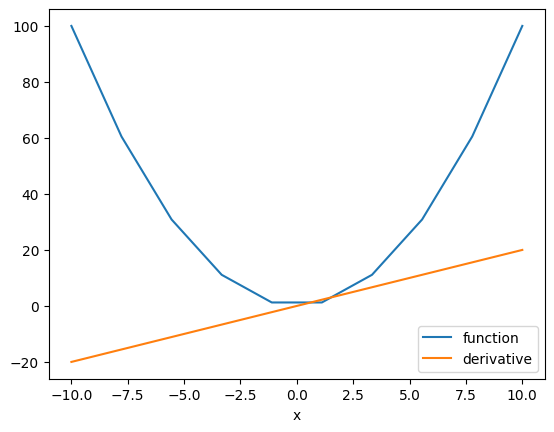

In [18]:
# Take the derivative with respect to multiple value. Plot out the function and its derivative

y.backward()

plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

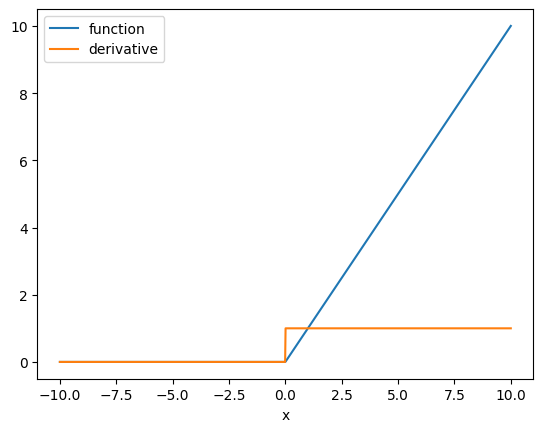

In [19]:
# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative

x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [20]:
u = torch.tensor(2.0, requires_grad = True)
v = torch.tensor(1.0, requires_grad = True)
f = u * v + (u * v) ** 2
f.backward()
print("The result is ", u.grad)

The result is  tensor(5.)
